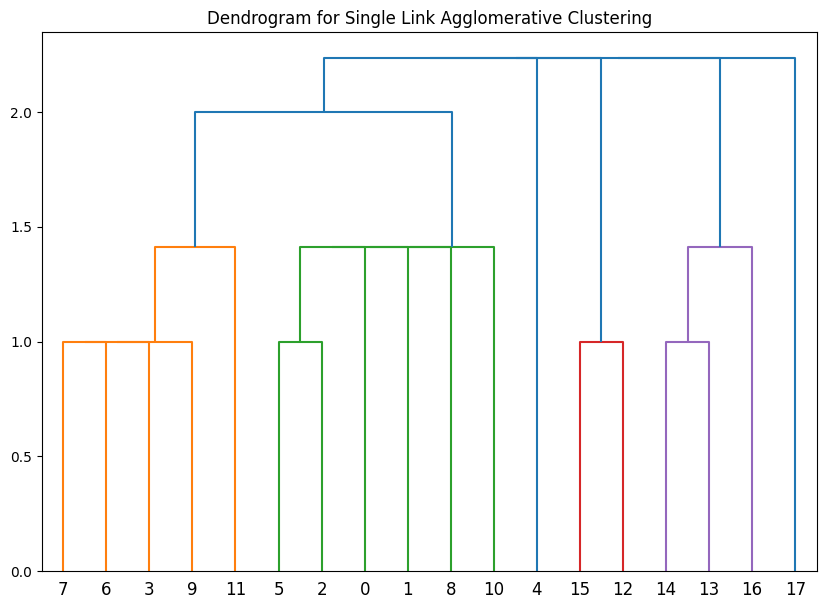

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.patches import Circle

# Provided data points
data_points = np.array([[1,5], [1,7], [2,6], [2,9], [3,3], [3,6], [3,8], [3,9], [4,5],
                        [4,8], [5,4], [5,7], [6,9], [7,2], [7,3], [7,9], [8,1], [8,7]])

# Perform single-link agglomerative clustering
linked = linkage(data_points, method='single')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Dendrogram for Single Link Agglomerative Clustering')
plt.show()


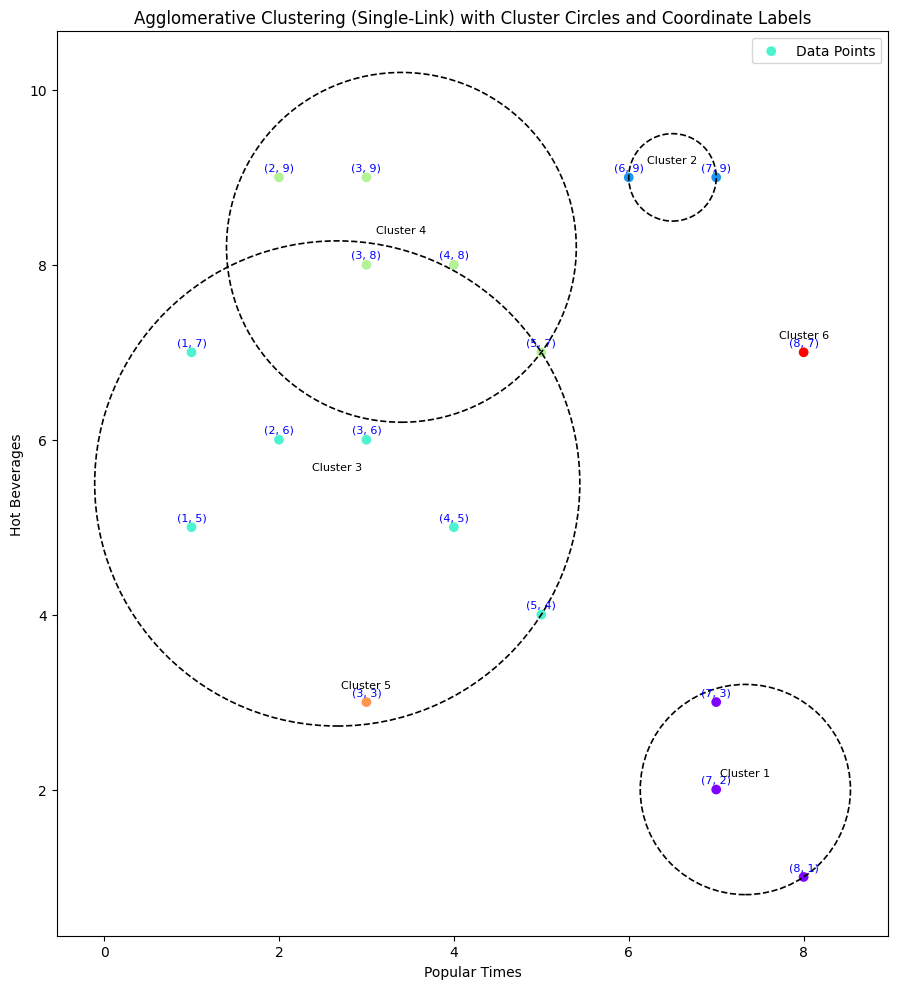

In [ ]:
# Extract clusters
max_d = 1.5  # Adjusted value based on the dendrogram
clusters = fcluster(linked, max_d, criterion='distance')

# Plot the clustered data
plt.figure(figsize=(12, 10))
plt.scatter(data_points[:,0], data_points[:,1], c=clusters, cmap='rainbow', label='Data Points')

# Label the data points with coordinates
for coord in data_points:
    plt.annotate(f'({coord[0]}, {coord[1]})', (coord[0], coord[1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='blue')

# Find and draw circles around clusters
num_clusters = np.max(clusters)
for i in range(1, num_clusters+1):
    # Extract points in this cluster
    cluster_points = data_points[clusters == i]

    # Calculate centroid
    centroid = np.mean(cluster_points, axis=0)

    # Calculate the distance of all points in the cluster from the centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1)

    # Find the maximum distance to determine the radius of the circle
    max_distance = np.max(distances)

    # Create a circle with centroid as the center and max_distance as radius
    circle = Circle(centroid, max_distance, color='black', fill=False, linestyle='--', linewidth=1.2)
    plt.gca().add_patch(circle)

    # Annotate the centroid
    plt.annotate(f'Cluster {i}', centroid, textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.title('Agglomerative Clustering (Single-Link) with Cluster Circles and Coordinate Labels')
plt.xlabel('Popular Times')
plt.ylabel('Hot Beverages')
plt.legend()
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')  # Keep circles circular
plt.tight_layout()
plt.show()